# K-Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

## Part A: Example

### We will use the iris dataset for this tutorial.

In [2]:
# Loads the iris dataset
iris = datasets.load_iris()

In [3]:
 print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

### We will need to extract required components from the 'iris' object obtained in the previous step. Namely the features and corresponding flower class. 

https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

In [4]:
iris_data = pd.DataFrame(iris.data, columns=iris['feature_names'])
iris_target = pd.DataFrame(iris.target, columns=['target'])

In [5]:
iris_data.shape

(150, 4)

In [6]:
iris_target.shape

(150, 1)

### The target/class variable obtained in the previous is encoded as integers. We will use some python and pandas trickery to obtain the actual class names.

In [7]:
# Map encoded target values to target names
def map_target(target_num):
    return iris.target_names[int(target_num)]

iris_target_name = iris_target.apply(map_target, 1)

### Now that we have loaded and processed our data, we will go ahead and fit a K-means model to the data. We will use 3 of the 4 features available. This will make it easier for us to visualize the results of the model.

In [8]:
# Fit a K-Means model to the data
kmeans_3 = KMeans(n_clusters=3)
kmeans_iris = kmeans_3.fit(iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']])

### Below code allows us to visualize our K-Means model's results.

<IPython.core.display.Javascript object>


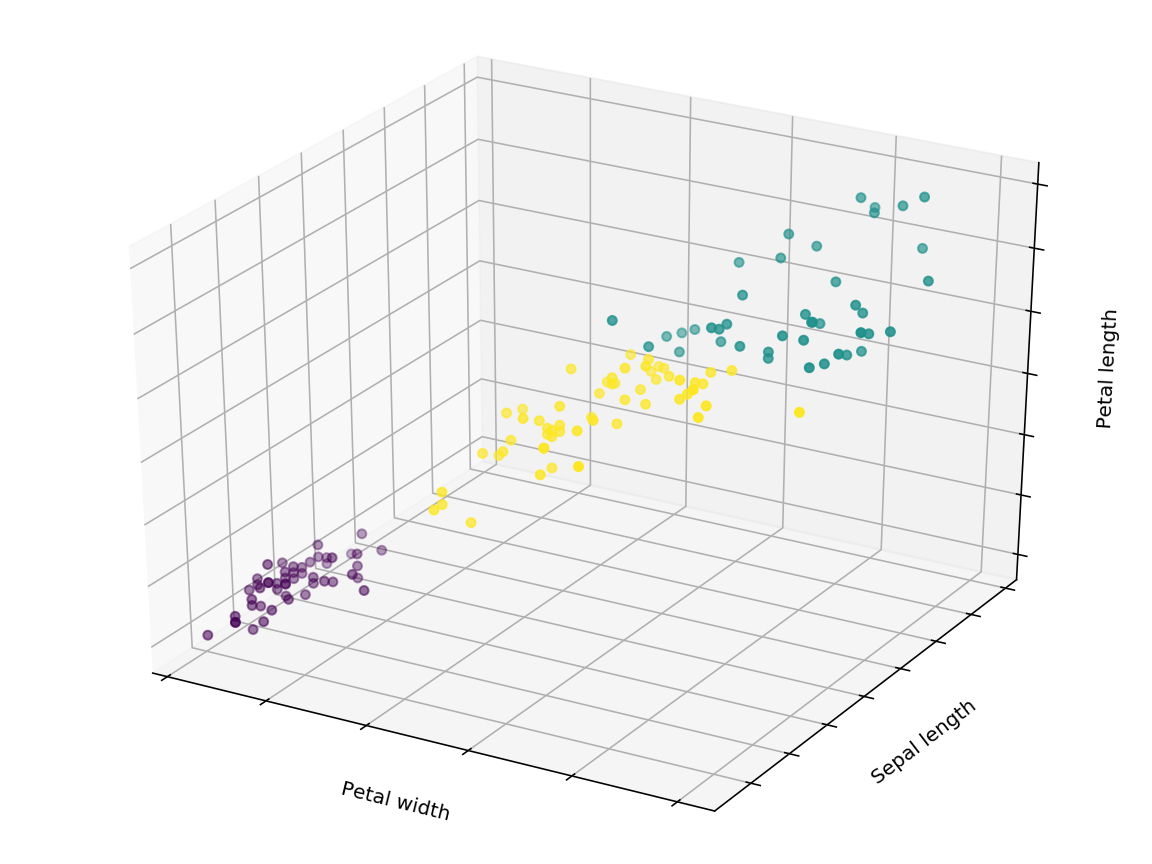

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [10]:
%matplotlib notebook
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)

labels = kmeans_iris.labels_

ax.scatter(iris_data.ix[:, 3], iris_data.ix[:, 0], iris_data.ix[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

plt.show()

### Below code visualizes actual classes from the iris data.

<IPython.core.display.Javascript object>


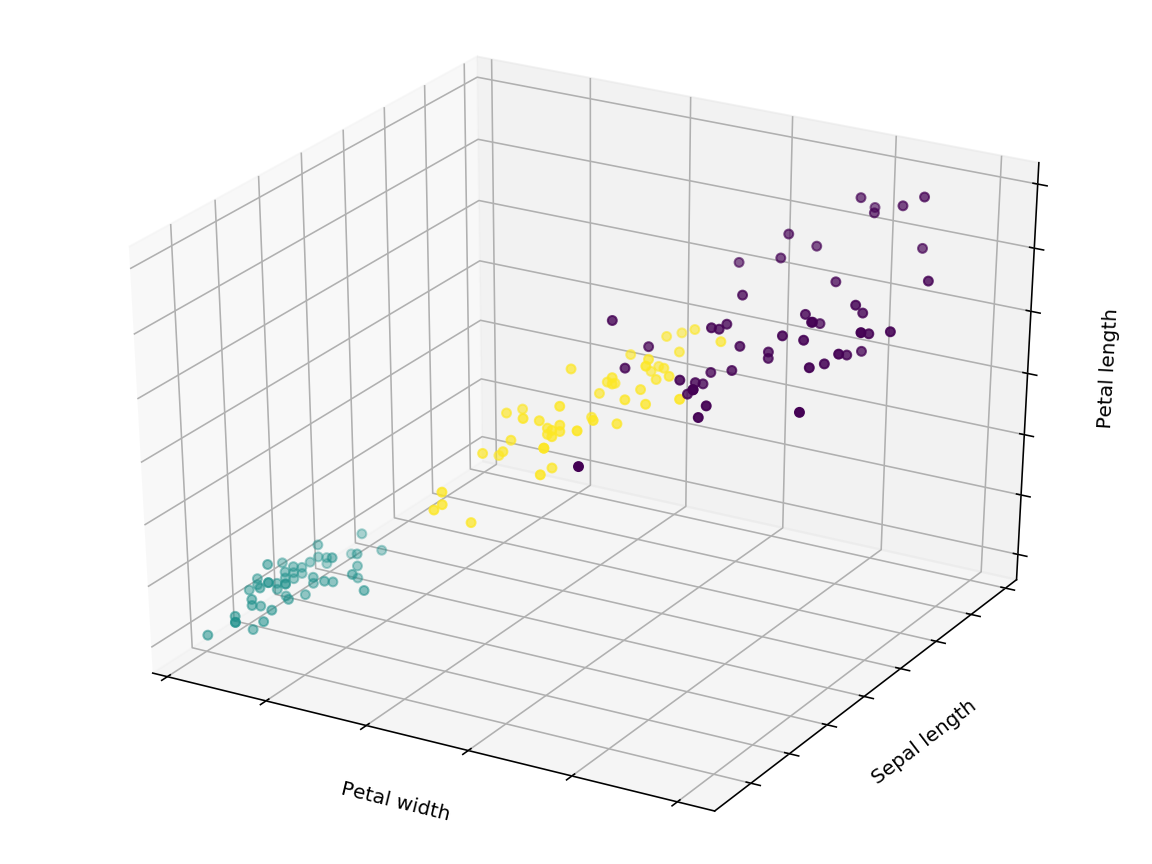

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [11]:
%matplotlib notebook

# Plot the ground truth
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

y = np.choose(iris_target.target, [1, 2, 0]).astype(np.float)
ax.scatter(iris_data.ix[:, 3], iris_data.ix[:, 0], iris_data.ix[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

### Show summary statistics of actual classes and predicted clusters that how the algorithm clubbed together data points belonging to different classes.

In [12]:
print(pd.Series([(iris_target.loc[i][0], kmeans_iris.labels_[i]) for i in range(len(iris.target))]).value_counts())

(0, 0)    50
(1, 2)    45
(2, 1)    37
(2, 2)    13
(1, 1)     5
dtype: int64


### As the above visualizations and statistics show, our simple model has done a decent task of classifying the datapoints into separate clusters. You can see that the two plots resemble each other. When compared with actual classes, the model clustered together some datapoints belonging to different classes. Although the predictions aren’t perfect, they come close. That’s a win for the algorithm.

## Elbow criterion for finding optimum number of clusters

### In unsupervised learning, you rarely get an output that’s 100 percent accurate because real-world data is rarely that simple.  
### Apart from simplicity of the dataset, the reason why above model performed so well was because we knew beforehand the optimum numbers of clusters, i.e. 3. Out in the wild, you won’t know how many clusters to choose (or any initialization parameter for other clustering algorithms). Such parameter-tuning is critical.

### One of the methods for finding out the optimum number of clusters for K-Means algorithm is the _elbow criterion_. 
### The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. 
### The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


<IPython.core.display.Javascript object>


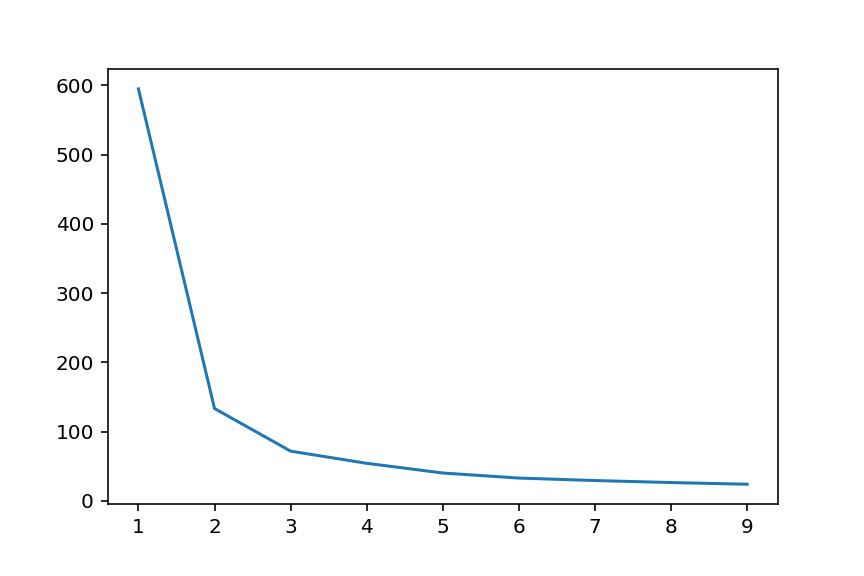

In [13]:
# Elbow criterion
def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
        data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']], maxK=10)


### As we can see from the above plot, 3 looks like a good choice for number of clusters.

### The elbow criterion doesn't always work well.. In cases like this, we might try a different method for determining the optimal k, such as computing silhouette scores, or we might reevaluate whether clustering is the right thing to do on our data.

# Part B: Do it yourself

### Now that we have loaded and processed our data, we will fit a second K-means model using all 4 features available - petal width, petal length, sepal width, and sepal length.

In [14]:
# Fit a K-Means model to the data
kmeans_3 = KMeans(n_clusters=3)
kmeans_iris = kmeans_3.fit(iris_data)

### Visualize the data : using 3 different features as the x,y,z axis of the 3D plot - petal width, sepal length, sepal width

## Elbow criterion for finding optimum number of clusters

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


<IPython.core.display.Javascript object>


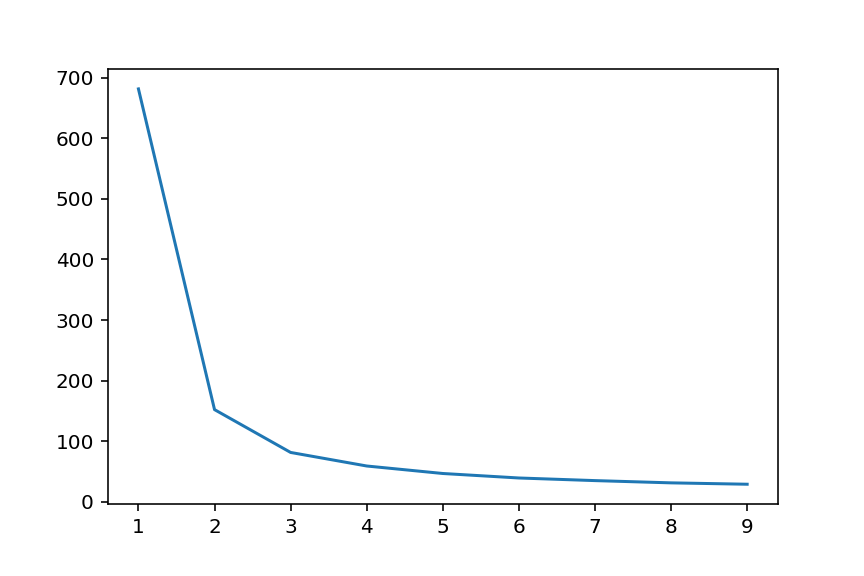

In [15]:
# Elbow criterion
def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
        data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(iris_data, maxK=10)

### The best k value is:

In [16]:
### As we can see from the above plot, 3 looks like a good choice for number of clusters.

# Part C: Example: KMeans for Color Compression

One interesting application of clustering is in color image compression. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and conversely a large number of pixels will have similar or identical colors.

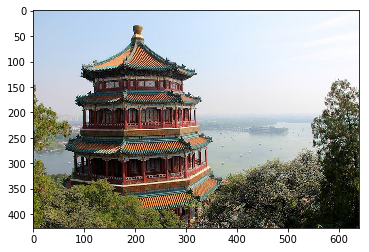

In [17]:
%matplotlib inline
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)
plt.grid(False)

In [18]:
from sklearn.cluster import MiniBatchKMeans

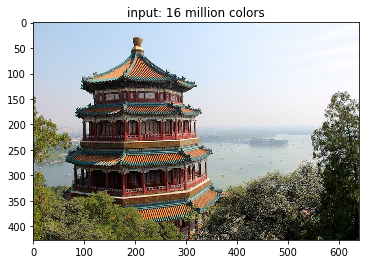

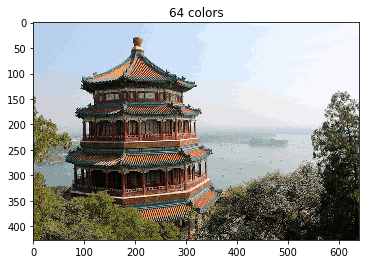

In [19]:
# reduce the size of the image for speed
n_colors = 64

X = (china / 255.0).reshape(-1, 3)
    
model = MiniBatchKMeans(n_colors)
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_image = colors[labels].reshape(china.shape)
new_image = (255 * new_image).astype(np.uint8)

# create and plot the new image
    
plt.figure()
plt.imshow(china)
plt.title('input: 16 million colors')
plt.grid(False);

plt.figure()
plt.imshow(new_image)
plt.title('{0} colors'.format(n_colors))
plt.grid(False);

Compare the input and output image: we've reduced the $256^3$ colors to just 64.

## Use your own image for color compression.

Try to compress your image using different parameters.  Compare the compression result, ex. compression ratio, image quality.

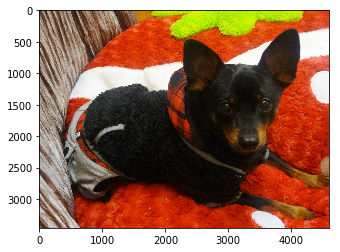

In [20]:
from skimage import io
from PIL import Image
%matplotlib inline
from sklearn.datasets import load_sample_image
pic = np.array(Image.open("dog.jpg"))
plt.imshow(pic)
plt.grid(False)

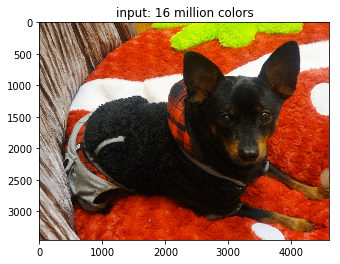

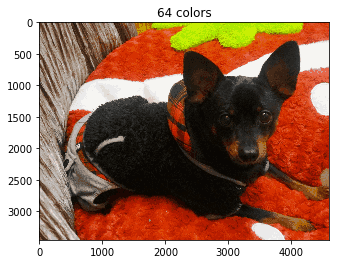

In [21]:
# reduce the size of the image for speed
n_colors = 64

X = (pic / 255.0).reshape(-1, 3)
    
model = MiniBatchKMeans(n_colors)
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_image = colors[labels].reshape(pic.shape)
new_image = (255 * new_image).astype(np.uint8)

# create and plot the new image
plt.figure()
plt.imshow(pic)
plt.title('input: 16 million colors')
plt.grid(False);

plt.figure()
plt.imshow(new_image)
plt.title('{0} colors'.format(n_colors))
plt.grid(False);

Compare the compression result:

In [ ]:
#When colors are reduced to 64, the shadows in the picture are more visible. 
#Parts with darker color also has expands to a greater extent in the picture.
#And some parts of the picture also shows different color (the color on top of the dog's head).